# Procesamiento de datos

In [292]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt
data_path = '../../data/'

## Exploración de datos

In [293]:
df = pd.read_csv(data_path + 'datasetfinal.csv')
df.head()

,alcaldia,eci,c_p,colonia,negocio,categoria,porcentaje_infectados,num_empleados
0,azcapotzalco,3.865509,13530,jaime torres bodet,zapatosbelleza,arreglosgeneral,0.1978,2
1,azcapotzalco,3.865509,2100,el rosario,manufacturados,industria,0.1573,0
2,azcapotzalco,3.865509,2459,tezozomoc,antojerias,restaurantes,0.1303,3
3,azcapotzalco,3.865509,6720,doctores,fotografia,fotografia,0.1169,3
4,azcapotzalco,3.865509,2459,tezozomoc,catalogo,ventaproductos,0.1303,2


In [294]:
num_colonias = len(df.colonia.unique())
num_productos = len(df.categoria.unique())
print(num_colonias, num_productos)
print(df.shape[0])

13 13
332


In [295]:
fig = px.histogram(df, x='colonia')
fig.update_layout(
    title=dict(
        text='Cantidad de productos por colonia'
    )
)
fig.show()

In [296]:
fig = px.histogram(df, x='alcaldia', color='eci')
fig.update_layout(
    title=dict(
        text='Cantidad de productos por alcaldia con ECI'
    )
)
fig.show()

In [297]:
fig = px.histogram(df, x='colonia', color='categoria')
fig.update_layout(
    title=dict(
        text="Distribución de productos (categoría) en las 13 colonias con mayor ECI"
    )
)
fig.show()

In [298]:
def view_products_from(colonia, df):
    temp = df[df.colonia==colonia]
    fig = px.histogram(temp, x='categoria')
    fig.update_layout(
        title=dict(text=f'Distribución de productos para {colonia.capitalize()}')
    )
    fig.show()

In [299]:
view_products_from('el rosario', df)

In [300]:
view_products_from('popotla', df)

In [301]:
view_products_from('tlaxpana', df)

## Product Space matrix

```product_space_matrix``` es la matriz que relaciona una colonia con los productos que produce.

En el renglón $i$, columna $j$ obtendremos un $0$ si la colonia $i$ NO produce el producto $j$ y un $1$ si sí lo produce.

In [302]:
product_space_matrix = np.array([[0]*num_productos]*num_colonias)
productos = list(df.categoria.unique())
colonias = list(df.colonia.unique())
for _, general_row in df.iterrows():
    curr_colonia = general_row.colonia
    categorias_por_colonia = list(df[df.colonia == curr_colonia].categoria.unique())
    col_idx = colonias.index(curr_colonia)
    for cat in categorias_por_colonia:
        cat_idx = productos.index(cat)
        product_space_matrix[col_idx][cat_idx] = 1

In [303]:
product_space_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

## Gráfica bipartita

In [304]:
colonias_dict = dict(zip(colonias, list(range(1,len(colonias)+1))))
productos_dict = dict(zip(productos, list(range(51, 50 + len(productos)+1))))
print(colonias_dict, end='\n\n')
print(productos_dict)

{'jaime torres bodet': 1, 'el rosario': 2, 'tezozomoc': 3, 'doctores': 4, 'olivar del conde 1a seccin': 5, 'campamento 2 de octubre': 6, 'popotla': 7, 'tlaxpana': 8, 'escandon': 9, 'san martin xochinahuac': 10, 'san juan tlihuaca': 11, 'xaltocan': 12, 'santa maria nativitas': 13}

{'arreglosgeneral': 51, 'industria': 52, 'restaurantes': 53, 'fotografia': 54, 'ventaproductos': 55, 'comida': 56, 'ropa': 57, 'papeleria': 58, 'belleza': 59, 'electronicos': 60, 'musica': 61, 'salud': 62, 'mascotas': 63}


In [305]:
G = nx.Graph()
G.add_nodes_from(colonias_dict.values())
G.add_nodes_from(productos_dict.values())
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63))

In [306]:
for colonia_idx in colonias_dict.values():
    for prod_idx in productos_dict.values():
        prod_idx -= 50
        if product_space_matrix[colonia_idx-1][prod_idx-1] == 1:
            G.add_edge(colonia_idx, prod_idx+50, color="#636ef9")

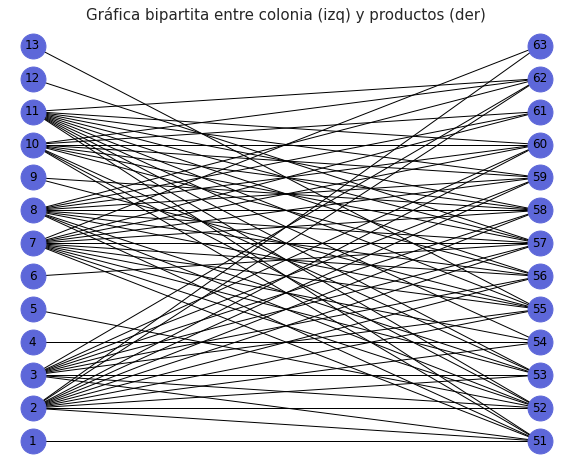

In [307]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_title("Gráfica bipartita entre colonia (izq) y productos (der)", fontsize=15, color="#262626")
top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G, pos=pos, with_labels=True, node_color="#5d67d9", ax=ax, node_size=620)

## Vectores de agrupaciones

Para cada colonia se creará un vector: $$(M_{c0}, M_{c1}, ECI_{ca}, S_c)$$

en donde: 
- $M_{c0}$: diversificación de productos
- $M_{c1}$: complejidad de producción
- $ECI_{ca}$: índice de complejidad (ECI) para la alcaldía $a$ de la colonia $c$
- $S_c$: porcentaje de infectados de COVID-19 para la colonia $c$

In [308]:
def productos_por(colonia, df):
    return list(df[df.colonia == colonia].categoria.unique())

def complejidad_por_producto(producto, product_space_matrix, prod_dict):
    prod_idx = prod_dict[producto.lower()]-50
    return product_space_matrix[:,prod_idx-1].sum()

def complejidad(colonia, df, product_space_matrix, prod_dict):
    complejidad_col = []
    for k in productos_por(colonia, df):
        comp = complejidad_por_producto(k, product_space_matrix, prod_dict)
        complejidad_col.append(comp)
    return sum(complejidad_col)

def diversificacion(colonia, product_space_matrix, col_dict):
    col_idx = col_dict[colonia.lower()]
    return product_space_matrix[col_idx-1].sum()

def eci_por(colonia, df):
    return np.round(df[df.colonia == colonia].eci.values[0],3)

def porcentaje_infectados_por(colonia, df):
    return df[df.colonia==colonia].porcentaje_infectados.values[0]

In [324]:
class VectorAgrupacion:
    def __init__(self, mc0, mc1, ecic, sc):
        self.mc0 = mc0
        self.mc1 = mc1
        self.ecic = ecic
        self.sc = sc

    def __str__(self):
        return f'<M0:{self.mc0}, M1:{self.mc1}, ECI:{self.ecic}, S:{self.sc}>'

class ColoniaAgrupacion:
    def __init__(self, colonia, vector_agrupacion):
        self.colonia = colonia
        self.vector_agrupacion = vector_agrupacion

    def __str__(self):
        return f'Col: {self.colonia.capitalize()} \n\t {self.vector_agrupacion}'

    def __repr__(self):
        return f'<Class:ColoniaAgrupacion> colonia: {self.colonia}'

In [331]:
colonias_agrupacion = []
for colonia in list(df.colonia.unique()):
    mc0 = diversificacion(colonia, product_space_matrix, colonias_dict)
    mc1 = complejidad(colonia, df, product_space_matrix, productos_dict)
    ecic = eci_por(colonia, df)
    sc = porcentaje_infectados_por(colonia, df)
    vector_agrupacion = VectorAgrupacion(mc0, mc1, ecic, sc)
    colonia_agrupacion = ColoniaAgrupacion(colonia, vector_agrupacion)
    colonias_agrupacion.append(colonia_agrupacion)

for col_ag in colonias_agrupacion:
    print(col_ag)

Col: Jaime torres bodet 
	 <M0:1, M1:7, ECI:3.866, S:0.1978>
Col: El rosario 
	 <M0:12, M1:71, ECI:3.866, S:0.1573>
Col: Tezozomoc 
	 <M0:10, M1:65, ECI:3.866, S:0.1303>
Col: Doctores 
	 <M0:1, M1:4, ECI:3.866, S:0.1169>
Col: Olivar del conde 1a seccin 
	 <M0:1, M1:7, ECI:3.855, S:0.1663>
Col: Campamento 2 de octubre 
	 <M0:1, M1:8, ECI:3.855, S:0.1124>
Col: Popotla 
	 <M0:12, M1:69, ECI:4.153, S:0.1528>
Col: Tlaxpana 
	 <M0:11, M1:68, ECI:4.153, S:0.1573>
Col: Escandon 
	 <M0:2, M1:14, ECI:4.153, S:0.1213>
Col: San martin xochinahuac 
	 <M0:10, M1:61, ECI:3.866, S:0.17980000000000002>
Col: San juan tlihuaca 
	 <M0:11, M1:69, ECI:3.866, S:0.2022>
Col: Xaltocan 
	 <M0:1, M1:8, ECI:4.153, S:0.2921>
Col: Santa maria nativitas 
	 <M0:1, M1:7, ECI:4.153, S:0.2427>


In [368]:
colonias_agrupacion_dict = dict(zip(list(range(0, len(colonias_agrupacion))), colonias_agrupacion))
colonias_agrupacion_dict

{0: <Class:ColoniaAgrupacion> colonia: jaime torres bodet,
 1: <Class:ColoniaAgrupacion> colonia: el rosario,
 2: <Class:ColoniaAgrupacion> colonia: tezozomoc,
 3: <Class:ColoniaAgrupacion> colonia: doctores,
 4: <Class:ColoniaAgrupacion> colonia: olivar del conde 1a seccin,
 5: <Class:ColoniaAgrupacion> colonia: campamento 2 de octubre,
 6: <Class:ColoniaAgrupacion> colonia: popotla,
 7: <Class:ColoniaAgrupacion> colonia: tlaxpana,
 8: <Class:ColoniaAgrupacion> colonia: escandon,
 9: <Class:ColoniaAgrupacion> colonia: san martin xochinahuac,
 10: <Class:ColoniaAgrupacion> colonia: san juan tlihuaca,
 11: <Class:ColoniaAgrupacion> colonia: xaltocan,
 12: <Class:ColoniaAgrupacion> colonia: santa maria nativitas}

# Gráfica completa

In [369]:
def peso_arista(colag1, colag2):
    return np.random.randint(1,10)

In [375]:
A = nx.Graph()
A.add_nodes_from(list(range(0, len(colonias_agrupacion))))
A.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

In [376]:
for i in range(len(colonias_agrupacion)):
    for j in range(len(colonias_agrupacion)):
        A.add_edge(i, j, weight=peso_arista(colonias_agrupacion_dict[i], colonias_agrupacion_dict[j]))
A.edges()

EdgeView([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (9, 9), (9, 10), (9, 11), (9, 12), (10, 10), (10, 11), (10, 12), (11, 11), (11, 12), (12, 12)])

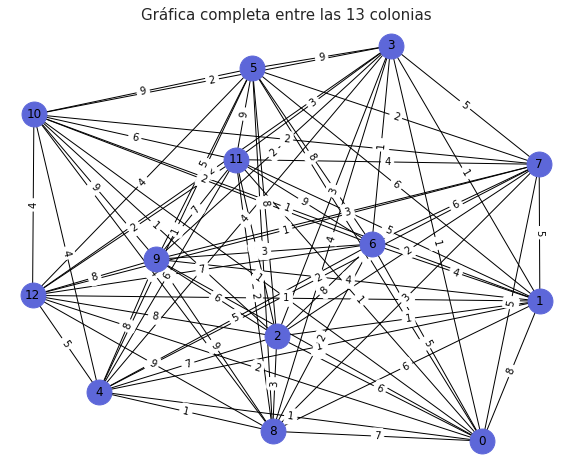

In [377]:
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.set_title("Gráfica completa entre las 13 colonias", fontsize=15, color="#262626")
pos = nx.spring_layout(A)
nx.draw(A, pos=pos, with_labels=True, node_color="#5d67d9", ax=ax, node_size=620)
labels = nx.get_edge_attributes(A,'weight')
nx.draw_networkx_edge_labels(A,pos,edge_labels=labels)
plt.show()

## Encontrando el árbol de peso mínimo

In [383]:
GRAPH_NODES = len(colonias_agrupacion)
edges_to_add = []
def Prim(G, start_vertex):
  intree = [False]*GRAPH_NODES
  distance = [10e12]*GRAPH_NODES
  parent = [-1]*GRAPH_NODES
  weight_labels = nx.get_edge_attributes(G,'weight') #diccionario con la arista como llave y peso como valor
  v = w = None
  weight = 0
  distance[start_vertex] = 0
  v = start_vertex
  while not intree[v]:
    intree[v] = True
    if v != start_vertex:
      print(f'\t Arista ({parent[v]},{v}) en el APM')
      edges_to_add.append((parent[v], v))
      weight += dist
    p = list(G.edges(v))
    while p:
      w = p[0][1]
      if p[0] in weight_labels:
        weight_p = weight_labels[p[0]]
      else:
        weight_p = weight_labels[(p[0][1], p[0][0])]
      if (distance[w] > weight_p) and (not intree[w]):
        distance[w] = weight_p
        parent[w] = v 
      p = p[1:]
    dist = 10e12
    for i in range(G.number_of_nodes()):
      if (not intree[i]) and (dist > distance[i]):
        dist = distance[i]
        v = i
  return weight

In [384]:
weight = Prim(A, 1)
print(weight)
print(edges_to_add)

	 Arista (1,2) en el APM
	 Arista (1,3) en el APM
	 Arista (3,0) en el APM
	 Arista (1,4) en el APM
	 Arista (4,5) en el APM
	 Arista (3,6) en el APM
	 Arista (4,8) en el APM
	 Arista (1,10) en el APM
	 Arista (0,11) en el APM
	 Arista (1,12) en el APM
	 Arista (12,7) en el APM
	 Arista (3,9) en el APM
13
[(1, 2), (1, 3), (3, 0), (1, 4), (4, 5), (3, 6), (4, 8), (1, 10), (0, 11), (1, 12), (12, 7), (3, 9)]
